# Part-1 Data Cleaning


### What's in this Notebook?
- I'll handshake with our dataset.
- I'll deal with incorrect column names.
- I'll deal with incorrect formatting.
- I'll deal with anomolies in our dataset.
- I'll drop the columns that I believe won't be useful in our machine learning model. 

In [177]:
%pip install termcolor

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [178]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import re

from skimpy import clean_columns

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### I'll add some user defined functions below that will be useful throught our cleaning.

In [179]:
# I'll use the function below when analyzing my data colun by column.

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [180]:
def show_distribution(col):
    
    '''
    This function will prints a Histogram and box plot which are graphical representations 
    for the frequency of numeric data values. It aims to describe the data and explore 
    the central tendency and variability before using advanced statistical analysis techniques. 
    '''
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))    
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    # Plot the histogram   
    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val,  color='orange',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    medianprops = dict(linestyle='-', linewidth=3, color='m')
    boxprops=dict(linestyle='-', linewidth=1.5)
    meanprops={"marker":"d", "markerfacecolor":"blue", "markeredgecolor":"black", "markersize":"10"}
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'fuchsia'}
    
    ax[1].boxplot(col, 
                  vert=False,
                  notch=True, 
                  patch_artist=False,
                  medianprops=medianprops,
                  flierprops=flierprops,
                  showmeans=True,
                  meanprops=meanprops)
    
    ax[1].set_xlabel('value', fontsize=10)
    
    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=20)

In [181]:
# We will use the function below to visually see null values in each column.
def show_nulls(data):
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

In [182]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + " " + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")


In [183]:
df = pd.read_json('C:/Users/ihsankoo/Desktop/Clarusway/Data Science/Car price prediction capstone project/as24_cars.json')
df0 =  df.copy()

# Here, I am creating an extra dataframe called df0. I'll work with df and in case I need to revert any change I'll use df0.

In [184]:
# Let's take a look at the data
df

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [185]:
# Hmm, we have 58 columns. To see every column I'll take look at the data from another perspective.
df.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [186]:
df.shape

(29480, 58)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [188]:
check_obj_columns(df)

Column make_model has mixed object types.
Column short_description has mixed object types.
Column make has mixed object types.
Column model has mixed object types.
Column location has mixed object types.
Column price has mixed object types.
Column Body type has mixed object types.
Column Type has mixed object types.
Column Doors has mixed object types.
Column Country version has mixed object types.
Column Offer number has mixed object types.
Column Warranty has mixed object types.
Column Mileage has mixed object types.
Column First registration has mixed object types.
Column Gearbox has mixed object types.
Column Fuel type has mixed object types.
Column Colour has mixed object types.
Column Paint has mixed object types.
Column desc has mixed object types.
Column seller has mixed object types.
Column Seats has mixed object types.
Column Power has mixed object types.
Column Engine size has mixed object types.
Column Gears has mixed object types.
Column CO₂-emissions has mixed object type

### As far as I can see from the general look at the data, it is pretty messy.

In [189]:
# I'll start my data cleaning with standardizing column names.

df = clean_columns(df)
df.columns

50 column names have been cleaned

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_&_convenience',
       'entertainment_&_media', 'safety_&_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'el

In [190]:
# Now, I'll take a look at the null values.

df.isnull().sum()

make_model                   850
short_description            850
make                         850
model                        850
location                     850
price                        850
body_type                    850
type                         850
doors                       1209
country_version            12591
offer_number                6380
warranty                   13696
mileage                      851
first_registration           852
gearbox                     1098
fuel_type                   2637
colour                      2574
paint                      14985
desc                        1433
seller                       850
seats                       3975
power                       1422
engine_size                 2253
gears                      10526
co_emissions               10886
manufacturer_colour         7693
drivetrain                 12587
cylinders                  10628
fuel_consumption            6095
comfort_&_convenience       4047
entertainm

<Figure size 720x360 with 0 Axes>

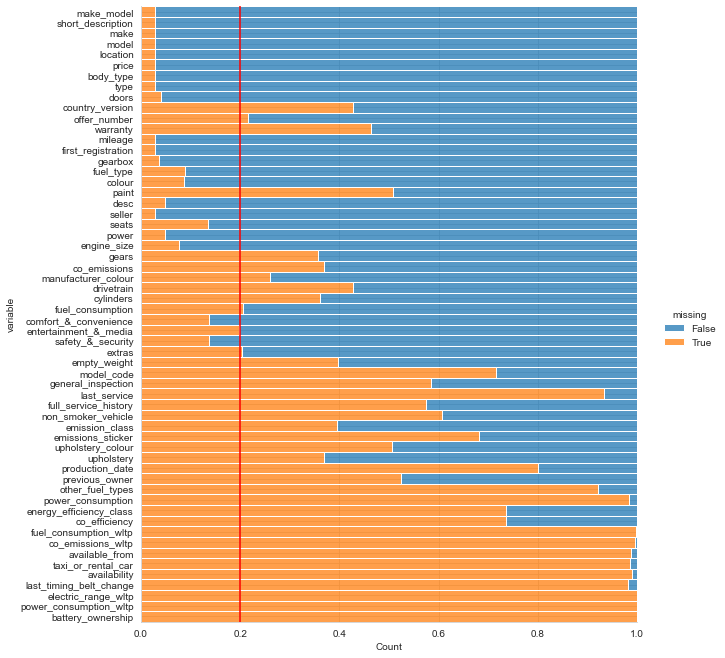

In [191]:
show_nulls(df)

In [192]:
missing_percentage = 100 * df.isnull().sum() / df.shape[0]

In [193]:
missing_percentage.loc[lambda x: x >= 80]

last_service              93.21
other_fuel_types          92.15
power_consumption         98.25
fuel_consumption_wltp     99.66
co_emissions_wltp         99.61
available_from            98.67
taxi_or_rental_car        98.57
availability              98.98
last_timing_belt_change   98.06
electric_range_wltp       99.95
power_consumption_wltp    99.95
battery_ownership         99.98
dtype: float64

### The columns above have more than 80% null values. I'll take a note here and if I can't fill those columns later, I might drop them.

In [194]:
df.shape

(29480, 58)

In [195]:
# Now let's take a look at the duplicated values.

df.astype(str).duplicated(keep=False).sum()

4384

In [196]:
df[df.astype(str).duplicated(keep=False)]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
579,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",NaN,"[\n, Yes, \n]","39,000 km",05/2003,[\nAutomatic\n],Regular/Benzine 91,Silver,Metallic,[Zum Verkauf steht ein gepflegter Mercedes-Ben...,Dealer,"[\n, 2, \n]",[\n120 kW (163 hp)\n],"[\n1,998 cc\n]",NaN,235 g/km (comb.),Brillantsilber metallic,NaN,NaN,"[[9.6 l/100 km (comb.)], [14.4 l/100 km (city)...","[Air conditioning, Armrest, Cruise control, El...","[CD player, Radio]","[Alarm system, Central door lock, Driver-side ...","[Alloy wheels, Sport seats]",NaN,NaN,New,NaN,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",NaN,"[\n, Yes, \n]","39,000 km",05/2003,[\nAutomatic\n],Regular/Benzine 91,Silver,Metallic,[Zum Verkauf steht ein gepflegter Mercedes-Ben...,Dealer,"[\n, 2, \n]",[\n120 kW (163 hp)\n],"[\n1,998 cc\n]",NaN,235 g/km (comb.),Brillantsilber metallic,NaN,NaN,"[[9.6 l/100 km (comb.)], [14.4 l/100 km (city)...","[Air conditioning, Armrest, Cruise control, El...","[CD player, Radio]","[Alarm system, Central door lock, Driver-side ...","[Alloy wheels, Sport seats]",NaN,NaN,New,NaN,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 29474, \n]",NaN,"172,000 km",02/1999,[\nAutomatic\n],Regular/Benzine 91 (Particle filter),Black,Metallic,"[unfallfrei, scheckheftgepflegt, Nichtraucher,...",Dealer,"[\n, 5, \n]",[\n218 kW (296 hp)\n],"[\n4,996 cc\n]",NaN,400 g/km (comb.),Schwarz obsidianschwarz metall,"[\n, 4WD, \n]",NaN,"[[16.7 l/100 km (comb.)], [21.8 l/100 km (city...","[Air conditioning, Armrest, Cruise control, El...","[On-board computer, Radio]","[Central door lock, Driver-side airbag, Fog li...","[Alloy wheels, Trailer hitch, Tuned car]","[\n2,350 kg\n]","[\n, 0710/403, \n]",New,NaN,Yes,Yes,Euro 4,4 (Green),Black,Full leather,1999.00,"[[172,000 km, 02/1999], 2]",NaN,NaN,G,Calculated on basis of measured CO₂-emissions ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 29474, \n]",NaN,"172,000 km",02/1999,[\nAutomatic\n],Regular/Benzine 91 (Particle filter),Black,Metallic,"[unfallfrei, scheckheftgepflegt, Nichtraucher,...",Dealer,"[\n, 5, \n]",[\n218 kW (296 hp)\n],"[\n4,996 cc\n]",NaN,400 g/km (comb.),Schwarz obsidianschwarz metall,"[\n, 4WD, \n]",NaN,"[[16.7 l/100 km (comb.)], [21.8 l/100 km (city...","[Air conditioning

In [197]:
df.shape

(29480, 58)

In [198]:
df.dropna(how='all', inplace=True)

I'll drop duplicate values at the end of the cleaning. Now, I'll start column by column analysis.

# CLEAN price

In [199]:
first_looking("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5021
--------------------------------
€ 14,990.-    222
€ 12,990.-    219
€ 16,990.-    186
€ 19,990.-    166
€ 9,990.-     160
             ... 
€ 19,112.-      1
€ 30,465.-      1
€ 18,461.-      1
€ 22,649.-      1
€ 4,440.-       1
Name: price, Length: 5021, dtype: int64


In [200]:
# I'll remove euro sign, white spaces, comma, point and dash

df['price'] = df['price'].str.replace('€ ', '').str.replace('.', '').str.replace('-', '').str.replace(',', '')

In [201]:
df.sample(3)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
15030,Skoda Rapid/Spaceback,1.4TDI Spaceback Ambition +PDC+Temp.+EU6+,\nSkoda\n,"[\n, Rapid/Spaceback ,\n]","Kornkamp 6, 22926 Ahrensburg, DE",10500,"[\n, Sedan, \n]","[\n, Used, \n]","[\n, 4, \n]",NaN,"[\n, AHR-509952, \n]","[\n, Yes, \n]","110,660 km",10/2017,[\nManual\n],Diesel,White,NaN,[Autokäufe und Lieferungen jederzeit möglich. ...,Dealer,"[\n, 5, \n]",[\n66 kW (90 hp)\n],"[\n1,422 cc\n]",NaN,105 g/km (comb.),Candy-Weiss,NaN,NaN,"[[4 l/100 km (comb.)], [4.4 l/100 km (city)], ...","[Air conditioning, Armrest, Cruise control, El...","[Bluetooth, Hands-free equipment, On-board com...","[ABS, Central door lock, Daytime running light...","[Alloy wheels, Cargo barrier, Voice Control]",NaN,NaN,New,NaN,Yes,Yes,Euro 6,4 (Green),Black,Cloth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14044,Skoda Rapid/Spaceback,1.0 TSI Active 70kW,\nSkoda\n,"[\n, Rapid/Spaceback ,\n]","AVENIDA GARCIA MORATO 50 EDIFICIO CHEK POINT, ...",14500,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7303472, \n]","[\n, 12 months, \n]","55,000 km",03/2019,[\nManual\n],Gasoline,Grey,NaN,"[ , Precio al contado: 16300 euros, , , Cond...",Dealer,"[\n, 5, \n]",[\n70 kW (95 hp)\n],[\n999 cc\n],[\n5\n],NaN,NaN,"[\n, Front, \n]",[\n3\n],"[[4.4 l/100 km (comb.)], [5.2 l/100 km (city)]...","[Air conditioning, Power windows, Split rear s...",[Hands-free equipment],"[ABS, Central door lock, Driver-side airbag, F...",NaN,"[\n1,165 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5123,Renault ZOE,"Q210 Zen Quickcharge 22 kWh (ex Accu) (89PK), ...",\nRenault\n,"[\n, ZOE ,\n]","Rijndijk 296, 2394 CG HAZERSWOUDE RIJNDIJK, NL",14400,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]",NaN,"[\n, NB-689-S, \n]",NaN,"37,630 km",01/2017,[\nAutomatic\n],NaN,White,NaN,"[‘Drive for change′. De kreet is Engels, maar ...",Dealer,"[\n, 5, \n]",[\n68 kW (92 hp)\n],NaN,[\n1\n],NaN,Wit,"[\n, Front, \n]",NaN,NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, Radio]","[ABS, Alarm system, Central door lock, Central...","[Alloy wheels (16""), Automatically dimming int...","[\n1,403 kg\n]",NaN,01/2023,NaN,Yes,NaN,NaN,NaN,Grey,Cloth,NaN,"[[37,630 km, 01/2017], 2]",Electricity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
df['price'].describe()

count     28630
unique     5021
top       14990
freq        222
Name: price, dtype: object

In [203]:
df.price = pd.to_numeric(df.price)

In [204]:
df.price.sample(5)

8031     12490
6664     15790
6740     11750
12776    14690
17422     9500
Name: price, dtype: int64

<AxesSubplot:xlabel='price'>

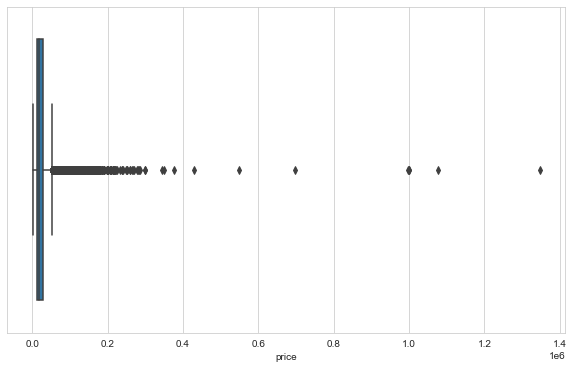

In [205]:
sns.boxplot(df['price'])

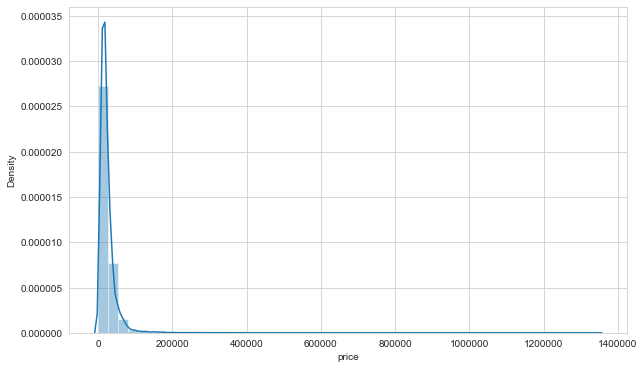

In [206]:
sns.distplot(df.price)

plt.ticklabel_format(style='plain')

Statistical Calculations :
--------------------------
Minimum: 490.00
Mean:  23555.20
Median:17980.00
Mode:  14990.00
Maximum:1346900.00



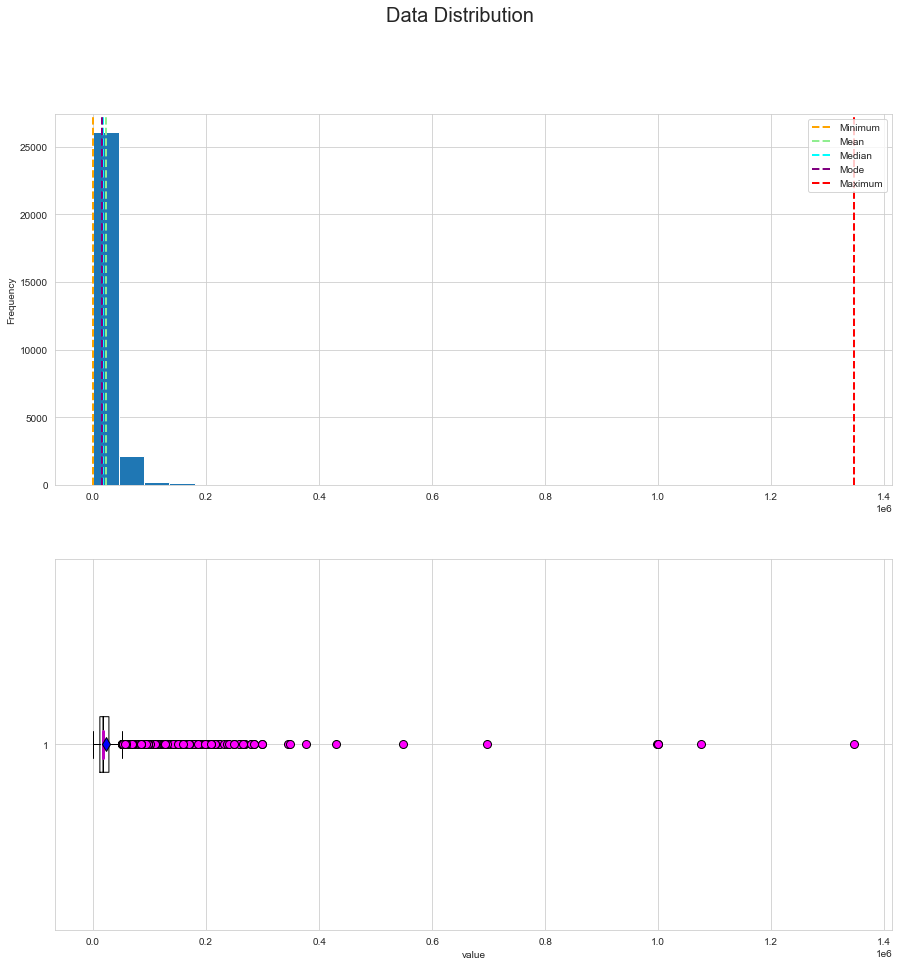

In [207]:
show_distribution(df['price'])

In [208]:
# I'll handle outliers in the next notebook.

# CLEAN make_model

In [209]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  611
--------------------------------
Renault Megane     863
SEAT Leon          787
Volvo V40          740
Dacia Sandero      730
Hyundai i30        706
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: make_model, Length: 611, dtype: int64


In [210]:
# This column looks clean, however I'll also check make and model columns and decide which one/s I'll continue.

# CLEAN make

In [211]:
first_looking('make')

column name    :  make
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13
--------------------------------
\nVolvo\n            3659
\nMercedes-Benz\n    2398
\nOpel\n             2385
\nPeugeot\n          2360
\nRenault\n          2351
\nFiat\n             2338
\nFord\n             2324
\nNissan\n           2064
\nToyota\n           2038
\nHyundai\n          1867
\nSEAT\n             1743
\nSkoda\n            1566
\nDacia\n            1537
Name: make, dtype: int64


In [212]:
df.make.str.strip('\n')

0        Mercedes-Benz
1        Mercedes-Benz
2        Mercedes-Benz
3        Mercedes-Benz
4        Mercedes-Benz
             ...      
29474            Volvo
29475            Volvo
29476            Volvo
29477            Volvo
29478            Volvo
Name: make, Length: 28630, dtype: object

In [213]:
df['make'] = df.make.str.strip('\n')

In [214]:
df.make.value_counts()

Volvo            3659
Mercedes-Benz    2398
Opel             2385
Peugeot          2360
Renault          2351
Fiat             2338
Ford             2324
Nissan           2064
Toyota           2038
Hyundai          1867
SEAT             1743
Skoda            1566
Dacia            1537
Name: make, dtype: int64

In [215]:
df.shape

(28630, 58)

# CLEAN model

In [216]:
first_looking('model')

column name    :  model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  594
--------------------------------
[\n, Megane ,\n]        863
[\n, Leon ,\n]          787
[\n, V40 ,\n]           740
[\n, Sandero ,\n]       730
[\n, i30 ,\n]           706
                       ... 
[\n, GLA 35 AMG ,\n]      1
[\n, G 55 AMG ,\n]        1
[\n, Ariya ,\n]           1
[\n, 105 ,\n]             1
[\n, 244 ,\n]             1
Name: model, Length: 594, dtype: int64


In [217]:
df['model'] = df['model'].astype(str).str.replace(r"\[|\\n|\]", "")

In [218]:
df['model'] = df['model'].apply(lambda x: re.sub(r"^'|'$|,", "", re.sub(r"'^,|,'$", "", x)))

In [219]:
df.model

0            A 160 
1          EQE 350 
2         A 45 AMG 
3         A 35 AMG 
4         A 45 AMG 
            ...    
29474          S90 
29475          S40 
29476          C30 
29477          S90 
29478          S80 
Name: model, Length: 28630, dtype: object

In [220]:
df.model.value_counts()

 Megane         863
 Leon           787
 V40            740
 Sandero        730
 i30            706
               ... 
 GLA 35 AMG       1
 G 55 AMG         1
 Ariya            1
 105              1
 244              1
Name: model, Length: 594, dtype: int64

In [221]:
df[['make_model', 'make', 'model']].sample(20)

,make_model,make,model
472,Mercedes-Benz AMG GT,Mercedes-Benz,AMG GT
22965,Ford Mondeo,Ford,Mondeo
22563,Ford Kuga,Ford,Kuga
1489,Mercedes-Benz GLC 250,Mercedes-Benz,GLC 250
25137,Hyundai iX20,Hyundai,iX20
15956,Dacia Duster,Dacia,Duster
8007,Peugeot 308,Peugeot,308
28490,Volvo V90,Volvo,V90
14980,Skoda Octavia,Skoda,Octavia
4333,Opel Insignia,Opel,Insignia


In [222]:
# I decided to continue my analysis with make_model column.

df.shape

(28630, 58)

In [223]:
df.drop(columns=['make'])

,make_model,short_description,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900,"[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [224]:
df.drop(columns=['model'])

,make_model,short_description,make,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900,"[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# CLEAN short_description

In [225]:
first_looking('short_description')

column name    :  short_description
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  20947
--------------------------------
                                                      213
D2 Momentum 120                                        88
D2 Kinetic 120                                         87
Cabrio 1.4T S&S Excellence                             85
Extreme+ 7-Sitzer TCe 110                              57
                                                     ... 
PureTech  EAT8 Allure Pack...DISP. PER NOLEGGIO         1
BlueHDi 130 S&S EAT8 Business                           1
2.0 BlueHDi 180ch S\u0026S GT Line EAT8                 1
1.2 PureTech Première AUT. NAVI PANO                    1
2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUISE! L      1
Name: short_description, Length: 20947, dtype: int64


Short description column has different kind of languages and has more than 20,000+ unique inputs. So, it is not useful for our machine learning model as it is. However, I'll first translate everything to english in case we could use the information in this column with filling other columns.

In [226]:
# from googletrans import Translator

# # Create a Translator object
# translator = Translator()

# # Define a function to translate text to English
# def translate_to_english(text):
#     try:
#         translation = translator.translate(text, dest='en')
#         return translation.text
#     except:
#         # If there's an error in translation, return the original text
#         return text

# # Apply the translation function to the "short_description" column of your DataFrame
# df['short_description'] = df['short_description'].apply(translate_to_english)

Translating every row in short_description with googletranslate API takes around 5 hours. Also google limit the daily free uasge with 500,000 words. Considering these facts, I decided not to move forward with this idea.

# CLEAN location

In [227]:
first_looking("location")

column name    :  location
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  8181
--------------------------------
Av. Laboral, 10,  28021 MADRID, ES                          306
Luckenwalder Berg 5,  14913 Jüterbog, DE                    170
Ctra. del Mig, 96,,  08097 L'Hospitalet de Llobregat, ES    146
9 boulevard Jules Ferry,  75011 Paris, FR                   142
Neuenhofstr. 77,  52078 Aachen, DE                          135
                                                           ... 
2727CT ZOETERMEER, NL                                         1
Rosendaalsestraat 437-439,  6824 CK ARNHEM, NL                1
5751VH DEURNE, NL                                             1
00148 roma, IT                                                1
Sur rendez-vous,  5060 Sambreville, BE                        1
Name: location, Length: 8181, dtype: int64


I'll extract this locatin data to another excel file. I'll then work with this data in Part-4. I'm thinking to extract pinpoint latitude & longitude from this column to create a heatmap. I'll most likely use bingmaps API and folium for this. Please see Part-4 for the HeatMap.

In [228]:
# df.location.to_excel('location.xlsx')

# CLEAN body_type

Domain Knowledge: Vehicle class and body type affect resale value for multiple reasons. One critical factor is geography. Sports cars and convertibles sell better in warm climates, where they’re practical throughout the year. Rugged SUVs and four-wheel-drive vehicles are more popular in colder climates and areas with rougher terrain.

In [229]:
first_looking('body_type')

column name    :  body_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
[\n, Station wagon, \n]       5448
[\n, Off-Road/Pick-up, \n]    5415
[\n, Compact, \n]             5387
[\n, Sedan, \n]               5043
[\n, Coupe, \n]               4009
[\n, Convertible, \n]         3328
Name: body_type, dtype: int64


In [230]:
df['body_type'] = df['body_type'].astype(str).str.replace(r"\[|\\n|\]|,|'", "")

In [231]:
df.body_type.sample(5)

17825             Coupe 
25885           Compact 
26017           Compact 
20823     Station wagon 
8289              Coupe 
Name: body_type, dtype: object

In [232]:
df.body_type.value_counts(dropna=False)

 Station wagon        5448
 Off-Road/Pick-up     5415
 Compact              5387
 Sedan                5043
 Coupe                4009
 Convertible          3328
Name: body_type, dtype: int64

# CLEAN type

In [233]:
first_looking("type")

column name    :  type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
[\n, Used, \n]              25251
[\n, Demonstration, \n]      1433
[\n, Pre-registered, \n]     1377
[\n, Employee's car, \n]      569
Name: type, dtype: int64


Domain Knowledge: 

Demonstration type: These are typically test driven by potential customers at the showroom. In the process, the car would have clocked up some mileage. Depending on how you look at it, can be quite a bargain when shopping for a car. After all, on paper at least, it offers quite a lot of savings compared to a brand-new car. More than often, these cars are top-spec models as dealers want to persuade customers to get the highest variant possible. Compared to a typical used car, getting an ex-demo car is way more straightforward and transparent, but no where as hassle-free as buying new.

Employee's car type: Vehicle provided by the business for both business and private use of an employee who usually is required to travel extensively for their role, for example, a regional sales manager. Due to its nature, this kind of cars will be driven by their owners and have more mileage than others. This is probably the most important factor in a resale. Greater the mileage, more the car has been used; hence higher wear and tear and impact on the engine. A lower reading on the odometer will always command a higher price.

In [234]:
df["type"] = df["type"].astype(str).str.replace(r"\[|\]|\\n|'|,", "")
df.type.sample(5)

26898     Used 
23228     Used 
27140     Used 
19961     Used 
6036      Used 
Name: type, dtype: object

In [235]:
df["type"] = df["type"].astype(str).str.replace('"', '')

In [236]:
df.type.value_counts()

 Used               25251
 Demonstration       1433
 Pre-registered      1377
 Employees car        569
Name: type, dtype: int64

# CLEAN doors

In [237]:
first_looking("doors")

column name    :  doors
--------------------------------
per_of_nulls   :  % 1.25
num_of_nulls   :  359
num_of_uniques :  7
--------------------------------
[\n, 5, \n]    17481
[\n, 2, \n]     5523
[\n, 4, \n]     3001
[\n, 3, \n]     2259
NaN              359
[\n, 6, \n]        5
[\n, 1, \n]        2
Name: doors, dtype: int64


In [238]:
df["doors"] = df["doors"].astype(str).str.replace(r"\[|'|\\n|,|\]", "")

In [239]:
df.doors.sample(5)

6575      4 
23143     5 
4860      5 
23093     5 
2727      5 
Name: doors, dtype: object

In [240]:
df.doors = df.doors.apply(lambda x: np.nan if x == "nan" else x)

In [241]:
df.doors.isna().sum()

359

In [242]:
df.doors = pd.to_numeric(df.doors)

In [243]:
df.doors.sample(5)

23179   5.00
29233   5.00
111     5.00
8400    5.00
6172    4.00
Name: doors, dtype: float64

# CLEAN country_version

In [244]:
first_looking("country_version")

column name    :  country_version
--------------------------------
per_of_nulls   :  % 41.01
num_of_nulls   :  11741
num_of_uniques :  26
--------------------------------
NaN                         11741
[\n, Germany, \n]            7939
[\n, Spain, \n]              6376
[\n, Italy, \n]               679
[\n, Belgium, \n]             641
[\n, European Union, \n]      340
[\n, Netherlands, \n]         306
[\n, Austria, \n]             266
[\n, France, \n]              101
[\n, United States, \n]        57
[\n, Czechia, \n]              47
[\n, Poland, \n]               31
[\n, Hungary, \n]              21
[\n, Denmark, \n]              21
[\n, Romania, \n]              12
[\n, Japan, \n]                12
[\n, Switzerland, \n]           9
[\n, Luxembourg, \n]            9
[\n, Sweden, \n]                6
[\n, Slovenia, \n]              5
[\n, Slovakia, \n]              4
[\n, Croatia, \n]               3
[\n, Bulgaria, \n]              1
[\n, Malta, \n]                 1
[\n, Canada, 

In [245]:
df["country_version"] = df["country_version"].astype(str).str.replace(r"\[|\\n|,|\]|'", "")

In [246]:
df.country_version = df.country_version.apply(lambda x: np.nan if x == 'nan' else x)

In [247]:
df["country_version"].value_counts()

 Germany            7939
 Spain              6376
 Italy               679
 Belgium             641
 European Union      340
 Netherlands         306
 Austria             266
 France              101
 United States        57
 Czechia              47
 Poland               31
 Hungary              21
 Denmark              21
 Romania              12
 Japan                12
 Switzerland           9
 Luxembourg            9
 Sweden                6
 Slovenia              5
 Slovakia              4
 Croatia               3
 Bulgaria              1
 Malta                 1
 Canada                1
 Mexico                1
Name: country_version, dtype: int64

In [248]:
df.country_version.isna().sum()

11741

# CLEAN offer_number

I'll directly drop this column becuase it has more than 20,000+ unique categorical data. If we had access to AutoScout's database we might fill some other columns with the information we could find in offer_number. However, we don't have an access to AutoScout's database.

In [249]:
df.drop(columns='offer_number')

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950,Compact,Used,5.00,Spain,"[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900,Compact,Pre-registered,4.00,Spain,"[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900,Compact,Used,5.00,Spain,"[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990,Compact,Used,5.00,Spain,"[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800,Compact,Used,5.00,Spain,"[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29474,Volvo S90,T8 Twin Business Plus AWD Aut.,Volvo,S90,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600,Sedan,Used,4.00,Spain,"[\n, 12 months, \n]","40,345 km",08/2019,[\nAutomatic\n],NaN,Black,NaN

# CLEAN warranty

In [250]:
first_looking('warranty')

column name    :  warranty
--------------------------------
per_of_nulls   :  % 44.87
num_of_nulls   :  12846
num_of_uniques :  66
--------------------------------
NaN                     12846
[\n, 12 months, \n]      9545
[\n, Yes, \n]            2319
[\n, 24 months, \n]      1515
[\n, 60 months, \n]       968
[\n, 6 months, \n]        398
[\n, 36 months, \n]       257
[\n, 3 months, \n]        185
[\n, 0 months, \n]        133
[\n, 48 months, \n]        78
[\n, 84 months, \n]        47
[\n, 72 months, \n]        40
[\n, 13 months, \n]        22
[\n, 8 months, \n]         19
[\n, 18 months, \n]        15
[\n, 1 months, \n]         15
[\n, 15 months, \n]        13
[\n, 14 months, \n]        13
[\n, 16 months, \n]        13
[\n, 30 months, \n]        12
[\n, 34 months, \n]        11
[\n, 21 months, \n]        11
[\n, 33 months, \n]        11
[\n, 32 months, \n]         9
[\n, 20 months, \n]         9
[\n, 23 months, \n]         9
[\n, 19 months, \n]         9
[\n, 17 months, \n]       

In [251]:
df.warranty = df.warranty.astype(str).str.replace(r"\[|\\|,|\]|[A-Za-z]|'", "")

In [252]:
df.warranty[29475]

''

In [253]:
df.warranty = df.warranty.apply(lambda x: np.nan if x == '' else x)

In [254]:
df.warranty = df.warranty.str.replace("  ", "")

In [255]:
df.warranty = pd.to_numeric(df.warranty)

In [256]:
df.warranty.value_counts(dropna = False)

NaN       15165
12.00      9545
24.00      1515
60.00       968
6.00        398
36.00       257
3.00        185
0.00        133
48.00        78
84.00        47
72.00        40
13.00        22
8.00         19
18.00        15
1.00         15
15.00        13
14.00        13
16.00        13
30.00        12
34.00        11
21.00        11
33.00        11
32.00         9
20.00         9
23.00         9
19.00         9
17.00         9
35.00         8
28.00         8
50.00         6
22.00         6
42.00         5
31.00         4
26.00         4
52.00         4
47.00         4
9.00          4
25.00         3
58.00         3
11.00         3
27.00         3
45.00         2
53.00         2
10.00         2
57.00         2
51.00         2
29.00         2
2.00          2
80.00         2
90.00         2
7.00          2
46.00         1
117.00        1
43.00         1
65.00         1
39.00         1
142.00        1
110.00        1
37.00         1
49.00         1
55.00         1
99.00         1
122.00  

# CLEAN mileage

Domain Knowledge: Actual kilometer on the cars is one of the most important factors which one may think that there is negative linear correlation between the price and the kilometers of the car. 

Cars stack, on average, 10,000-15,000 kms in mileage, each year. The more miles your car has been driven, the lower its market value will get generally. Cars with higher mileage on the odometer tend to be exposed to greater wear and tear, and are more likely to require a greater focus on maintenance and repairs. Mileage is also a key ranking factor for prospective used car buyers – the general rule of thumb being that a car with lower miles is viewed more favourably by buyers. 

In [257]:
first_looking('mileage')

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  14184
--------------------------------
10 km         586
1 km          172
50 km         133
100 km        119
5,000 km      118
             ... 
141,589 km      1
59,821 km       1
123,500 km      1
29,781 km       1
230,047 km      1
Name: mileage, Length: 14184, dtype: int64


In [258]:
df.mileage = df.mileage.astype(str).str.replace(r",|[A-Za-z]", "").str.strip()

In [259]:
df.mileage = df.mileage.apply(lambda x: np.nan if x == '' else x)

In [260]:
df.mileage = pd.to_numeric(df.mileage)

In [261]:
df.mileage.value_counts(dropna=False)

10.00        586
1.00         172
50.00        133
100.00       119
5000.00      118
            ... 
141589.00      1
59821.00       1
123500.00      1
29781.00       1
230047.00      1
Name: mileage, Length: 14184, dtype: int64

# CLEAN first_registration

In [479]:
df['first_registration'] = df0['First registration'].copy()

In [480]:
first_looking('first_registration')

column name    :  first_registration
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  656
--------------------------------
08/2022    454
06/2022    428
05/2019    420
06/2019    418
07/2019    416
          ... 
06/1967      1
06/1980      1
09/1970      1
06/1963      1
10/1979      1
Name: first_registration, Length: 656, dtype: int64


I'll only keep the year in this column and use it as a model year for the car.

In [481]:
df.first_registration = df.first_registration.str.extract('.*(\d{4})', expand=False)

In [482]:
df.first_registration = pd.to_numeric(df.first_registration)

In [483]:
df.first_registration.isna().sum()

2

In [484]:
df.first_registration.value_counts()

2019.00    3667
2018.00    3492
2022.00    3086
2021.00    2870
2020.00    2473
2017.00    2426
2016.00    1486
2015.00    1237
2014.00     936
2013.00     703
2012.00     655
2011.00     642
2010.00     559
2007.00     492
2008.00     441
2009.00     424
2006.00     395
2005.00     287
2004.00     247
2003.00     211
2001.00     191
2002.00     187
2000.00     160
1999.00     144
1998.00      91
1997.00      81
1994.00      80
1995.00      78
1996.00      71
1991.00      62
1992.00      60
1993.00      55
1990.00      54
1966.00      41
1967.00      34
1988.00      33
1965.00      32
1973.00      29
1972.00      29
1968.00      27
1987.00      26
1978.00      23
1986.00      22
1989.00      20
1970.00      19
1985.00      18
1971.00      18
1979.00      17
1969.00      17
1983.00      16
1975.00      14
1977.00      13
1982.00      11
1964.00      11
1976.00      11
1984.00      10
1974.00       9
1963.00       9
1981.00       9
1962.00       8
1961.00       7
1955.00       6
1980.00 

# CLEAN production_date

I'll clean outliers in the next notebook

In [485]:
df["production_date"] = df0["Production date"].copy()

In [487]:
first_looking('production_date')

column name    :  production_date
--------------------------------
per_of_nulls   :  % 79.36
num_of_nulls   :  22722
num_of_uniques :  50
--------------------------------
NaN        22722
2019.00     1179
2021.00      980
2022.00      894
2020.00      763
2018.00      762
2017.00      391
2016.00      239
2015.00      118
2014.00       90
2013.00       76
2010.00       53
2012.00       43
2011.00       43
2008.00       34
2009.00       26
2007.00       20
2006.00       17
2002.00       15
2004.00       13
2003.00       13
1967.00       12
2001.00       12
1966.00       11
1999.00        9
2005.00        9
1965.00        9
1970.00        9
1997.00        8
1994.00        8
1968.00        7
2000.00        7
1998.00        5
1990.00        3
1973.00        3
1987.00        3
1993.00        3
1991.00        3
1996.00        3
1995.00        2
1969.00        2
1978.00        2
1982.00        2
1961.00        1
1954.00        1
1988.00        1
1962.00        1
1981.00        1
1985.00      

In [268]:
# from pandasql import sqldf
# pysqldf = lambda q: sqldf(q, globals())

# q = """
# SELECT first_registration, production_date, COUNT(*) AS count
# FROM df
# WHERE first_registration IS NOT NULL AND production_date IS NOT NULL
# GROUP BY first_registration, production_date
# ORDER BY count DESC
# """

# pysqldf(q)


In [488]:
df[(df["first_registration"].notnull()) &\
   (df["production_date"].notnull()) &\
   (df["first_registration"]!=df["production_date"])]\
    [["first_registration","production_date"]]

,first_registration,production_date
23,2019.00,2018.00
30,2020.00,2018.00
31,2020.00,2019.00
470,2022.00,2021.00
472,2019.00,2016.00
...,...,...
29350,2019.00,2017.00
29380,2022.00,2021.00
29414,2022.00,2021.00
29426,2020.00,2019.00


I'll create a new column for the cars' age.

In [489]:
# The data provided for this project is assumes we are in the year of 2022

df['age'] = 2022 - df['first_registration']
df['age']

0        6.00
1        0.00
2        2.00
3        2.00
4        7.00
         ... 
29474    3.00
29475   18.00
29476   11.00
29477    5.00
29478   20.00
Name: age, Length: 28630, dtype: float64

In [490]:
df.age.value_counts()

3.00       3667
4.00       3492
0.00       3086
1.00       2870
2.00       2473
5.00       2426
6.00       1486
7.00       1237
8.00        936
9.00        703
10.00       655
11.00       642
12.00       559
15.00       492
14.00       441
13.00       424
16.00       395
17.00       287
18.00       247
19.00       211
21.00       191
20.00       187
22.00       160
23.00       144
24.00        91
25.00        81
28.00        80
27.00        78
26.00        71
31.00        62
30.00        60
29.00        55
32.00        54
56.00        41
55.00        34
34.00        33
57.00        32
49.00        29
50.00        29
54.00        27
35.00        26
44.00        23
36.00        22
33.00        20
52.00        19
37.00        18
51.00        18
43.00        17
53.00        17
39.00        16
47.00        14
45.00        13
40.00        11
58.00        11
46.00        11
38.00        10
48.00         9
59.00         9
41.00         9
60.00         8
61.00         7
67.00         6
42.00   

In [272]:
df.shape

(28630, 58)

In [491]:
df = df.drop(columns=["first_registration", "production_date"])

In [274]:
df.shape

(28630, 56)

# CLEAN gearbox

Domain Knowledge: Though manual transmissions (stick shifts) have historically been slightly more fuel-efficient than automatic transmissions, they’re usually detrimental to resale value in some cultures. That’s because most drivers don’t know how to drive stick, have mobility issues that make shifting painful or difficult, or simply don’t like keeping their right hands and left feet in constant motion in stop-and-go traffic.

In [275]:
first_looking('gearbox')

column name    :  gearbox
--------------------------------
per_of_nulls   :  % 0.87
num_of_nulls   :  248
num_of_uniques :  4
--------------------------------
[\nManual\n]            17023
[\nAutomatic\n]         11287
NaN                       248
[\nSemi-automatic\n]       72
Name: gearbox, dtype: int64


In [276]:
df.gearbox = df.gearbox.astype(str).str.replace(r"\[|\\n|\]|'", "")

In [277]:
df.gearbox.value_counts(dropna=False)

Manual            17023
Automatic         11287
nan                 248
Semi-automatic       72
Name: gearbox, dtype: int64

In [278]:
df.gearbox = df.gearbox.apply(lambda x: np.nan if x == "nan" else x)

In [279]:
df.gearbox.value_counts(dropna=False)

Manual            17023
Automatic         11287
NaN                 248
Semi-automatic       72
Name: gearbox, dtype: int64

# CLEAN power

In [280]:
first_looking("power")

column name    :  power
--------------------------------
per_of_nulls   :  % 2.0
num_of_nulls   :  572
num_of_uniques :  352
--------------------------------
[\n110 kW (150 hp)\n]      1992
[\n96 kW (131 hp)\n]       1356
[\n88 kW (120 hp)\n]       1182
[\n81 kW (110 hp)\n]       1166
[\n66 kW (90 hp)\n]        1110
                           ... 
[\n746 kW (1,014 hp)\n]       1
[\n570 kW (775 hp)\n]         1
[\n471 kW (640 hp)\n]         1
[\n179 kW (243 hp)\n]         1
[\n26 kW (35 hp)\n]           1
Name: power, Length: 352, dtype: int64


I'll create 2 new columns from the information on power column called power_kW and power_hp and drop power.

In [281]:
df[['power_kW', 'power_hp']] = df["power"].apply(lambda item: item[0] if type(item) == list else item)\
                              .str.extract(r'\D*(?P<kW>\d+)\D+(?P<hp>\d+)').astype(float)

In [282]:
df.loc[:, ["power", "power_kW", "power_hp"]]

,power,power_kW,power_hp
0,NaN,NaN,NaN
1,[\n215 kW (292 hp)\n],215.00,292.00
2,[\n310 kW (421 hp)\n],310.00,421.00
3,[\n225 kW (306 hp)\n],225.00,306.00
4,[\n100 kW (136 hp)\n],100.00,136.00
...,...,...,...
29474,[\n288 kW (392 hp)\n],288.00,392.00
29475,[\n125 kW (170 hp)\n],125.00,170.00
29476,[\n84 kW (114 hp)\n],84.00,114.00
29477,[\n187 kW (254 hp)\n],187.00,254.00


In [283]:
df.shape

(28630, 58)

In [284]:
df = df.drop(columns=["power"])

In [285]:
df.shape

(28630, 57)

# CLEAN fuel_type

Domain Knowledge: Another key factor affecting used car prices is fuel economy. Efficient vehicles tend to hold their value better when gas prices are high, while less efficient vehicles (which typically have more cargo space and higher safety ratings) do better when gas is cheap.

In [286]:
first_looking("fuel_type")

column name    :  fuel_type
--------------------------------
per_of_nulls   :  % 6.24
num_of_nulls   :  1787
num_of_uniques :  47
--------------------------------
Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
Regular/Benzine 91                                                                                    2065
NaN                                                                                                   1787
Super E10 95                                                                                          1016
Regular/Benzine 91 (Particle filter)                                                    

In [287]:
# I'll categorize these fuel types in under 5 categories which are benzine, diesel, liquid/natural gas, electric.

In [288]:
df.fuel_type.sample(10)

22000    Liquid petroleum gas (LPG) / Super 95
2729                    Regular/Benzine E10 91
15437                                      NaN
15184                             Super E10 95
24887                 Diesel (Particle filter)
11731                                   Diesel
15470                                 Gasoline
12724                 Diesel (Particle filter)
2240                                  Super 95
10367                                 Gasoline
Name: fuel_type, dtype: object

In [289]:
df["fuel_type"].str.split("/").value_counts(dropna=False)

[Gasoline]                                                                                                    8532
[Diesel]                                                                                                      5911
[Super 95]                                                                                                    3557
[Diesel (Particle filter)]                                                                                    2816
[Regular, Benzine 91]                                                                                         2065
NaN                                                                                                           1787
[Super E10 95]                                                                                                1016
[Regular, Benzine 91 (Particle filter)]                                                                        555
[Super 95 (Particle filter)]                                                    

In [290]:
df.fuel_type = df["fuel_type"].str.split("/").str[0].str.strip()

In [291]:
df.fuel_type = df["fuel_type"].str.split("(").str[0].str.strip()

In [292]:
df.fuel_type.value_counts(dropna=False)

Gasoline                8728
Diesel                  8727
Super 95                4097
Regular                 2906
NaN                     1787
Super E10 95            1340
Others                   213
Electric                 188
Super Plus 98            185
Liquid petroleum gas     165
CNG                       95
Super Plus E10 98         77
LPG                       77
Domestic gas H            25
Domestic gas L            13
Ethanol                    3
Hydrogen                   3
Biogas                     1
Name: fuel_type, dtype: int64

In [293]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others", "Ethanol"]
petroleum_gas = ["Liquid petroleum gas", "CNG", "LPG", "Domestic gas H", "Domestic gas L", "Biogas", "Hydrogen"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in petroleum_gas:
        return "Liquid/Natural Gas"
    else:
        return x

df["fuel_type"] = df["fuel_type"].apply(fueltype)

In [294]:
df.fuel_type.value_counts(dropna=False)

Benzine               17549
Diesel                 8727
NaN                    1787
Liquid/Natural Gas      379
Electric                188
Name: fuel_type, dtype: int64

In [451]:
# get information from other_fuel_type and assign
df.loc[~df.other_fuel_types.isna() & df.fuel_type.isna(),['fuel_type']] = df[~df.other_fuel_types.isna() & df.fuel_type.isna()].other_fuel_types

In [452]:
df.fuel_type.value_counts(dropna=False)

Benzine               17549
Diesel                 8727
Electricity            1767
Liquid/Natural Gas      379
Electric                188
NaN                      10
Hydogen                  10
Name: fuel_type, dtype: int64

In [453]:
df['fuel_type'] = df['fuel_type'].str.replace('Hydogen', 'Hydrogen')

In [454]:
df['fuel_type'] = df['fuel_type'].str.replace('Electricity', 'Electric')

In [455]:
df.fuel_type.value_counts(dropna=False)

Benzine               17549
Diesel                 8727
Electric               1955
Liquid/Natural Gas      379
NaN                      10
Hydrogen                 10
Name: fuel_type, dtype: int64

# CLEAN color

In [295]:
df = df.rename(columns={"colour":"color"})

In [296]:
first_looking("color")

column name    :  color
--------------------------------
per_of_nulls   :  % 6.02
num_of_nulls   :  1724
num_of_uniques :  15
--------------------------------
Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
NaN       1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: color, dtype: int64


# CLEAN manufacturer_color

In [297]:
df = df.rename(columns={"manufacturer_colour":"manufacturer_color"})

In [298]:
first_looking("manufacturer_color")

column name    :  manufacturer_color
--------------------------------
per_of_nulls   :  % 23.9
num_of_nulls   :  6843
num_of_uniques :  4964
--------------------------------
NaN                               6843
Blanco                            1235
Gris                               671
Azul                               552
Negro                              546
                                  ... 
Colore esterno (snowflake whit       1
Pompeigraumetallic                   1
Cararragrau                          1
ICE WHITE (wit metallic)             1
Denim Blue metallic (blauw met       1
Name: manufacturer_color, Length: 4964, dtype: int64


In [299]:
df[['color', 'manufacturer_color']]

,color,manufacturer_color
0,Black,NaN
1,NaN,Negro Obsidiana
2,Grey,Mountaingrau magno
3,Yellow,Amarillo Sol
4,White,NaN
...,...,...
29474,Black,NaN
29475,Grey,Grijs
29476,Grey,NaN
29477,Blue,Denim Blue metallic (blauw met


In [300]:
df[(df.color.isnull()) & df.manufacturer_color.notnull()][['color', 'manufacturer_color']]

,color,manufacturer_color
1,NaN,Negro Obsidiana
24,NaN,GRIS GRAFITO
37,NaN,Plata Iridio
145,NaN,Gris Montagne
169,NaN,Bleu denim métallisé
...,...,...
29434,NaN,Blanc Cristal
29439,NaN,Gris Osmium
29440,NaN,Noir Onyx Métallisé
29441,NaN,Gris Osmium


In [301]:
df = df.drop(columns=["color", "manufacturer_color", "paint"])

In [302]:
df.shape

(28630, 54)

# CLEAN seller

In [303]:
first_looking("seller")

column name    :  seller
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
Dealer            26318
Private seller     2312
Name: seller, dtype: int64


# CLEAN seats

In [304]:
first_looking("seats")

column name    :  seats
--------------------------------
per_of_nulls   :  % 10.92
num_of_nulls   :  3125
num_of_uniques :  12
--------------------------------
[\n, 5, \n]     18308
[\n, 4, \n]      5390
NaN              3125
[\n, 2, \n]      1186
[\n, 7, \n]       488
[\n, 8, \n]        43
[\n, 9, \n]        35
[\n, 3, \n]        25
[\n, 6, \n]        12
[\n, 0, \n]         9
[\n, 1, \n]         7
[\n, 17, \n]        2
Name: seats, dtype: int64


In [305]:
df.seats = df.seats.astype(str).str.replace(r"\[|\\n|,|'|\]", "")

In [306]:
df.seats = df.seats.apply(lambda x: np.nan if x == "nan" else x)

In [307]:
df.seats = pd.to_numeric(df.seats)

In [308]:
df.seats.value_counts(dropna=False)

5.00     18308
4.00      5390
NaN       3125
2.00      1186
7.00       488
8.00        43
9.00        35
3.00        25
6.00        12
0.00         9
1.00         7
17.00        2
Name: seats, dtype: int64

# CLEAN engine_size

Domain Knowledge: Does the engine capacity affect the price of a vehicle?

 - A larger engine tends to be more expensive for the manufacturer to build. This cost is usually recovered (plus a nice profit) by increasing the price toward the customer.
 - Many cars will have more equipment standard with the larger engine, equipment that would be chargeable extras when the car is ordered with a smaller engine. The cost of this equipment is added to the base price of the car.
Direct taxation on engine displacement in some places. Some countries or states will calculate taxes directly on the displacement. Even with power, emissions and such identical between a large and a small engine, obsolete and nonsensical rules dictate more tax to be paid on the big one.
 - Indirect taxation on typical side effects of larger engines. Back in the day, a large engine would be more powerful than a small engine, so a tax on horsepower would hit a large engine harder than a small one. Of course, with turbocharging becoming common, a small engine with a turbocharger often has more horsepower than a large engine without a turbocharger, and thus the stronger, smaller engine would be taxed more. These days, emissions-based taxes are more popular, and larger engines tend to have more emissions than smaller engines, triggering higher taxes on the larger engines.

In [309]:
first_looking("engine_size")

column name    :  engine_size
--------------------------------
per_of_nulls   :  % 4.9
num_of_nulls   :  1403
num_of_uniques :  468
--------------------------------
[\n1,598 cc\n]    2099
[\n999 cc\n]      2068
[\n1,969 cc\n]    1929
NaN               1403
[\n1,461 cc\n]    1110
                  ... 
[\n2,753 cc\n]       1
[\n2,495 cc\n]       1
[\n200 cc\n]         1
[\n3,224 cc\n]       1
[\n2,473 cc\n]       1
Name: engine_size, Length: 468, dtype: int64


In [310]:
df.engine_size

0                   NaN
1            [\n1 cc\n]
2        [\n1,991 cc\n]
3        [\n1,991 cc\n]
4        [\n2,143 cc\n]
              ...      
29474    [\n1,969 cc\n]
29475    [\n2,435 cc\n]
29476    [\n1,560 cc\n]
29477    [\n1,969 cc\n]
29478    [\n2,922 cc\n]
Name: engine_size, Length: 28630, dtype: object

In [311]:
df.engine_size = df.engine_size.astype(str).str.replace(r"\[|\\n|cc|'|,|\]", "").str.strip()

In [312]:
df.engine_size = df.engine_size.apply(lambda x: np.nan if x == 'nan' else x)

In [313]:
df.engine_size = pd.to_numeric(df.engine_size)

In [314]:
df.engine_size.value_counts(dropna=False)

1598.00    2099
999.00     2068
1969.00    1929
NaN        1403
1461.00    1110
           ... 
2753.00       1
2495.00       1
200.00        1
3224.00       1
2473.00       1
Name: engine_size, Length: 468, dtype: int64

In [315]:
df.engine_size

0           NaN
1          1.00
2       1991.00
3       1991.00
4       2143.00
          ...  
29474   1969.00
29475   2435.00
29476   1560.00
29477   1969.00
29478   2922.00
Name: engine_size, Length: 28630, dtype: float64

In [316]:
df.engine_size.isna().sum()

1403

In [317]:
# Fill some of the nan values from short description

df.loc[df.engine_size.isna(),['engine_size']] = df.loc[df.engine_size.isna(),['engine_size','short_description']].short_description.str.extract(r'(\d+\.\d+)').astype(float).apply(lambda x: x * 1000)[0]

In [318]:
df.engine_size.isna().sum()

1027

In [319]:
df.engine_size.value_counts()

1598.00    2099
999.00     2068
1969.00    1929
1461.00    1110
1998.00    1000
           ... 
982.00        1
600.00        1
1739.00       1
549.00        1
2473.00       1
Name: engine_size, Length: 477, dtype: int64

# CLEAN gears

In [320]:
first_looking("gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 33.8
num_of_nulls   :  9676
num_of_uniques :  12
--------------------------------
NaN         9676
[\n6\n]     8412
[\n5\n]     5335
[\n7\n]     1738
[\n8\n]     1690
[\n1\n]      712
[\n9\n]      642
[\n4\n]      256
[\n10\n]     112
[\n0\n]       31
[\n3\n]       24
[\n2\n]        2
Name: gears, dtype: int64


In [321]:
df.gears = df.gears.astype(str).str.replace(r"\[|\\n|'|\]", "").str.strip()

In [322]:
df.gears = df.gears.apply(lambda x: np.nan if x == "nan" else x)

In [323]:
df.gears = pd.to_numeric(df.gears)

In [324]:
df.gears.value_counts(dropna=False)

NaN      9676
6.00     8412
5.00     5335
7.00     1738
8.00     1690
1.00      712
9.00      642
4.00      256
10.00     112
0.00       31
3.00       24
2.00        2
Name: gears, dtype: int64

# CLEAN co_emissions

In [325]:
first_looking("co_emissions")

column name    :  co_emissions
--------------------------------
per_of_nulls   :  % 35.05
num_of_nulls   :  10036
num_of_uniques :  348
--------------------------------
NaN                  10036
0 g/km (comb.)        1038
119 g/km (comb.)       393
124 g/km (comb.)       340
129 g/km (comb.)       319
                     ...  
7 g/km (comb.)           1
80 g/km (comb.)          1
196  g/km (comb.)        1
100  g/km (comb.)        1
53 g/km (comb.)          1
Name: co_emissions, Length: 348, dtype: int64


In [326]:
df.co_emissions

0                     NaN
1          0 g/km (comb.)
2                     NaN
3                     NaN
4                     NaN
               ...       
29474                 NaN
29475    217 g/km (comb.)
29476     99 g/km (comb.)
29477    149 g/km (comb.)
29478    251 g/km (comb.)
Name: co_emissions, Length: 28630, dtype: object

In [327]:
df.co_emissions = df.co_emissions.astype(str).str.replace(r"[a-z]|\/|\.|\(|\)|,", "").str.strip()

In [328]:
df.co_emissions = df.co_emissions.apply(lambda x: np.nan if x == "" else x)

In [329]:
df.co_emissions = pd.to_numeric(df.co_emissions)

In [330]:
df.co_emissions.value_counts(dropna=False)

NaN        10036
0.00        1040
119.00       393
124.00       340
129.00       319
           ...  
3.00           1
1320.00        1
343.00         1
73.00          1
53.00          1
Name: co_emissions, Length: 334, dtype: int64

# CLEAN drivetrain

Domain Knowledge: A car’s drivetrain includes all of the components necessary to transfer the engine’s energy to its wheels in order to make your vehicle move. A car’s drivetrain connects the engine to the wheels enabling the vehicle to move. As the engine runs, the drivetrain helps send power through the transmission to the drive wheels. The drive wheels can be either the front wheels, rear wheels, or all the wheels — also known as front-wheel, rear-wheel, and all-wheel drive.

An Automotive Drivetrain is a combination of various components that provide power to the vehicle's wheel. It is made up of a driveshaft, transmission or gearbox, universal joints, constant velocity joints, wheels, and axles. It allows the driver to control the power flow and multiplies the engine torque for controlling the engine speed.

Nowadays, the introduction of stringent emission regulations in European and North American countries has boosted demand for improved Automotive drivetrains that are lightweight and hence assist in increasing fuel efficiency, reducing emissions, and improving vehicle performance.

In [331]:
first_looking("drivetrain")

column name    :  drivetrain
--------------------------------
per_of_nulls   :  % 41.0
num_of_nulls   :  11737
num_of_uniques :  4
--------------------------------
[\n, Front, \n]    12066
NaN                11737
[\n, 4WD, \n]       3252
[\n, Rear, \n]      1575
Name: drivetrain, dtype: int64


In [332]:
df.drivetrain = df.drivetrain.astype(str).str.replace(r"\[|\\n|,|'|\]", "").str.strip()

In [333]:
df.drivetrain = df.drivetrain.apply(lambda x: np.nan if x == "nan" else x)

In [334]:
df.drivetrain.value_counts(dropna=False)

Front    12066
NaN      11737
4WD       3252
Rear      1575
Name: drivetrain, dtype: int64

# CLEAN cylinders

In [335]:
first_looking("cylinders")

column name    :  cylinders
--------------------------------
per_of_nulls   :  % 34.15
num_of_nulls   :  9778
num_of_uniques :  13
--------------------------------
[\n4\n]     13068
NaN          9778
[\n3\n]      3258
[\n6\n]      1013
[\n5\n]       799
[\n8\n]       539
[\n2\n]       103
[\n0\n]        35
[\n1\n]        21
[\n12\n]        8
[\n7\n]         6
[\n26\n]        1
[\n16\n]        1
Name: cylinders, dtype: int64


In [336]:
df.cylinders

0            NaN
1            NaN
2        [\n4\n]
3        [\n4\n]
4        [\n4\n]
          ...   
29474    [\n4\n]
29475    [\n5\n]
29476    [\n4\n]
29477    [\n4\n]
29478    [\n6\n]
Name: cylinders, Length: 28630, dtype: object

In [337]:
df.cylinders = df.cylinders.astype(str).str.extract(r"(\d+)").astype("float")

In [338]:
df.cylinders.value_counts(dropna=False)

4.00     13068
NaN       9778
3.00      3258
6.00      1013
5.00       799
8.00       539
2.00       103
0.00        35
1.00        21
12.00        8
7.00         6
26.00        1
16.00        1
Name: cylinders, dtype: int64

# CLEAN fuel_consumption

Domain Knowledge: Efficient vehicles tend to hold their value better when gas prices are high, while less efficient vehicles (which typically have more cargo space and higher safety ratings) do better when gas is cheap.

In [339]:
first_looking("fuel_consumption")

column name    :  fuel_consumption
--------------------------------
per_of_nulls   :  % 18.32
num_of_nulls   :  5245
num_of_uniques :  3453
--------------------------------
NaN                                                                            5245
[[0 l/100 km (comb.)]]                                                          330
[[0 l/100 km (comb.)], [0 l/100 km (city)], [0 l/100 km (country)]]             306
[[3.4 l/100 km (comb.)], [3.7 l/100 km (city)], [3.2 l/100 km (country)]]       170
[[4 l/100 km (comb.)]]                                                          149
                                                                               ... 
[[14.2 l/100 km (comb.)], [21.3 l/100 km (city)], [10 l/100 km (country)]]        1
[[3.5 l/100 km (comb.)], [4.4 l/100 km (city)], [2.9 l/100 km (country)]]         1
[[4.5 l/100 km (comb.)], [6.2 l/100 km (city)], [3.5 l/100 km (country)]]         1
[[4.9 l/100 km (comb.)], [99.9 l/100 km (city)], [98 l/100 km (country)

Since this data provided by a European company they use fuel consumption parameter as total liters consumed per 100km rather than mpg we use here in the US.

In [340]:
df.fuel_consumption.iloc[2]

[['8.4 l/100 km (comb.)'],
 ['10.9 l/100 km (city)'],
 ['5.8 l/100 km (country)']]

In [341]:
df['fuel_consumption_comb'] = df.fuel_consumption.astype(str).str.extract('(\d+(\.\d+)?)\s*l\/100 km\s*\(comb.\)')[0].astype(float)

In [342]:
df['fuel_consumption_city'] = df.fuel_consumption.astype(str).str.extract('(\d+(\.\d+)?)\s*l\/100 km\s*\(city\)')[0].astype(float)

In [343]:
df['fuel_consumption_country'] = df.fuel_consumption.astype(str).str.extract('(\d+(\.\d+)?)\s*l\/100 km\s*\(country\)')[0].astype(float)

In [344]:
# CONTROL 
df.loc[~df.fuel_consumption_wltp.isna(),['fuel_consumption_wltp']]

,fuel_consumption_wltp
234,3.9 l/100 km
474,9.3 l/100 km
484,12.6 l/100 km
557,10.4 l/100 km
572,12.9 l/100 km
601,7.6 l/100 km
608,9.1 l/100 km
656,6.8 l/100 km
747,9.6 l/100 km
748,9.3 l/100 km


In [345]:
# CLEAN fuel_consumption_wltp

df['fuel_consumption_wltp'] = df.fuel_consumption_wltp.astype(str).str.extract('(\d+(\.\d+)?)\s*l\/100 km')[0].astype(float)

In [346]:
def calc_fuel_consumption_avg(row):
    # if fuel_consumption_comb is not NaN, use its value
    if not pd.isna(row['fuel_consumption_comb']):
        return row['fuel_consumption_comb']
    # if fuel_consumption_comb is NaN, calculate the average
    else:
        city = row['fuel_consumption_city']
        country = row['fuel_consumption_country']
        if not pd.isna(city) and not pd.isna(country) and country != 0:
            return (float(city) * 1.0 + float(country) * 1.0) / 2.0
        else:
            return np.nan

# apply the function to create the new column
df['fuel_consumption_avg'] = df.apply(calc_fuel_consumption_avg, axis=1)

In [347]:
df[(df['fuel_consumption_comb'].isna()) & ~(df['fuel_consumption_city'].isna())].shape

(26, 58)

In [348]:
# CONTROL
df.loc[~df.fuel_consumption_wltp.isna() & df.fuel_consumption_avg.isna(),['fuel_consumption_wltp','fuel_consumption_avg']]

,fuel_consumption_wltp,fuel_consumption_avg
234,3.90,NaN
474,9.30,NaN
484,12.60,NaN
557,10.40,NaN
572,12.90,NaN
601,7.60,NaN
608,9.10,NaN
656,6.80,NaN
747,9.60,NaN
748,9.30,NaN


In [349]:
df.fuel_consumption_avg.isna().sum()

5402

In [350]:
# FILL with df.fuel_consumption_wltp

df.loc[~df.fuel_consumption_wltp.isna() & df.fuel_consumption_avg.isna(),['fuel_consumption_avg']] = df.loc[~df.fuel_consumption_wltp.isna() & df.fuel_consumption_avg.isna()].fuel_consumption_wltp


In [351]:
df.fuel_consumption_avg.isna().sum()

5302

In [352]:
df.shape

(28630, 58)

In [355]:
df = df.drop(columns=['fuel_consumption',
                 'fuel_consumption_country',
                 'fuel_consumption_city',
                 'fuel_consumption_comb',
                 'fuel_consumption_wltp'])

# CLEAN empty_weight

In [356]:
first_looking("empty_weight")

column name    :  empty_weight
--------------------------------
per_of_nulls   :  % 37.97
num_of_nulls   :  10872
num_of_uniques :  1219
--------------------------------
NaN               10872
[\n1,395 kg\n]      233
[\n1,055 kg\n]      224
[\n1,423 kg\n]      216
[\n1,165 kg\n]      200
                  ...  
[\n1,877 kg\n]        1
[\n1,011 kg\n]        1
[\n1,069 kg\n]        1
[\n983 kg\n]          1
[\n1,391 kg\n]        1
Name: empty_weight, Length: 1219, dtype: int64


In [359]:
df.empty_weight = df.empty_weight.astype(str).str.replace(r"\[|\\n|\]|'|,|kg", "").str.strip()

In [360]:
df.empty_weight = df.empty_weight.apply(lambda x: np.nan if x == "nan" else x)

In [361]:
df.empty_weight = pd.to_numeric(df.empty_weight)

In [363]:
df.empty_weight.value_counts(dropna=False)

NaN        10872
1395.00      233
1055.00      224
1423.00      216
1165.00      200
           ...  
1877.00        1
1011.00        1
1069.00        1
983.00         1
1391.00        1
Name: empty_weight, Length: 1219, dtype: int64

# CLEAN model_code

Domain Knowledge: The model code is to identify the manufacturer, car name, body shape, engine type, and displacement, etc.! At first glance, the model code looks like a series of letters and numbers.

Car parts are different from one car to another, even for the ones with the same model and manufacture/registration year. To identify the right parts for your car, we need the "Model Code" and the "Chassis Number" that are written on the ID plate of the vehicle. Model Code (or Number) for each models.
And it is same for each models. Chassis Number (or VIN Code) is provided for each vehicles but it is different from each other even with the same model.

In [364]:
first_looking("model_code")

column name    :  model_code
--------------------------------
per_of_nulls   :  % 70.78
num_of_nulls   :  20263
num_of_uniques :  2187
--------------------------------
NaN                   20263
[\n, 8212/AFJ, \n]       75
[\n, 1727/AAM, \n]       64
[\n, 1349/AGI, \n]       61
[\n, 1889/ABU, \n]       55
                      ...  
[\n, 7593/ANL, \n]        1
[\n, 1727/ABC, \n]        1
[\n, 4136/AEC, \n]        1
[\n, 4136/668, \n]        1
[\n, 9101/449, \n]        1
Name: model_code, Length: 2187, dtype: int64


In [369]:
df.model_code[4072]

['\n, 1844/AAJ, \n']

In [372]:
df.model_code = df.model_code.astype(str).str.replace(r"\[|\\n|,|\]|'", "").str.strip()

In [373]:
df.model_code = df.model_code.apply(lambda x: np.nan if x == 'nan' else x)

We might fill some other columns with using model_code column because model_code column will give us the specific model of the car and with that specific model we can find a lot of information on web. I'll drop it right now but I'll take a note here and search how could it be done. 

In [374]:
df = df.drop(columns=["model_code"])

In [376]:
df.shape

(28630, 52)

# CLEAN general inspection

In [378]:
first_looking("general_inspection")

column name    :  general_inspection
--------------------------------
per_of_nulls   :  % 57.2
num_of_nulls   :  16376
num_of_uniques :  92
--------------------------------
NaN        16376
New         5883
05/2023      286
08/2023      280
03/2023      268
06/2023      266
04/2023      262
09/2023      255
07/2023      254
06/2024      216
05/2024      212
01/2023      210
02/2023      209
03/2024      207
07/2024      203
08/2024      187
09/2024      182
11/2023      176
01/2024      164
02/2024      163
04/2024      162
12/2023      160
12/2022      159
10/2023      155
06/2025      147
11/2022      131
08/2025      122
07/2025      110
09/2022       96
03/2025       95
05/2025       93
10/2022       90
04/2025       89
01/2025       75
02/2025       66
09/2025       65
10/2024       64
08/2022       64
12/2024       61
11/2024       50
06/2022       42
07/2022       41
04/2022       34
03/2022       25
05/2022       22
10/2021       17
11/2021       11
01/2022       10
07/2021    

In [379]:
df = df.drop(columns=["general_inspection"])

In [381]:
df.shape

(28630, 51)

# CLEAN full_service_history

Domain Knowledge: By keeping and maintaining your car service logbook, your car’s value will gain a boost. The logbook shows all the fixes and updates your car has gone through, which allows the buyer to have confidence in what he or she is getting.

In [387]:
first_looking("full_service_history")

column name    :  full_service_history
--------------------------------
per_of_nulls   :  % 56.11
num_of_nulls   :  16065
num_of_uniques :  2
--------------------------------
NaN    16065
Yes    12565
Name: full_service_history, dtype: int64


In [388]:
df.full_service_history = df.full_service_history.replace(np.nan, "No")

In [389]:
df.full_service_history.value_counts(dropna=False)

No     16065
Yes    12565
Name: full_service_history, dtype: int64

# CLEAN non_smoker_vehicle

In [390]:
first_looking("non_smoker_vehicle")

column name    :  non_smoker_vehicle
--------------------------------
per_of_nulls   :  % 59.5
num_of_nulls   :  17036
num_of_uniques :  2
--------------------------------
NaN    17036
Yes    11594
Name: non_smoker_vehicle, dtype: int64


In [391]:
df.non_smoker_vehicle = df.non_smoker_vehicle.replace(np.nan, "No")

In [392]:
df.non_smoker_vehicle.value_counts()

No     17036
Yes    11594
Name: non_smoker_vehicle, dtype: int64

# CLEAN emission_class

Domain Knowledge: Although emissions regulations date back to 1970, the first EU-wide standard – known as Euro 1 – wasn’t introduced until 1992, which saw catalytic converters became compulsory on new cars, effectively standardising fuel injection. 

Since then, there have been a series of Euro emissions standards, leading to the current Euro 6, introduced in September 2014 for new type approvals and rolled out for the majority of vehicle sales and registrations in September 2015. Euro 6 applies to all new cars registered from 1 September 2015.

In [393]:
first_looking("emission_class")

column name    :  emission_class
--------------------------------
per_of_nulls   :  % 37.62
num_of_nulls   :  10771
num_of_uniques :  10
--------------------------------
NaN             10771
Euro 6           6418
Euro 6d-TEMP     3399
Euro 6d          2858
Euro 5           2389
Euro 4           1743
Euro 3            523
Euro 2            217
Euro 1            172
Euro 6c           140
Name: emission_class, dtype: int64


In [394]:
Euro_6 = ["Euro 6", "Euro 6d-TEMP", "Euro 6d", "Euro 6c"]

def emission_class(x):
    if x in Euro_6:
        return "Euro 6"
    else:
        return x
    
df.emission_class = df.emission_class.apply(emission_class)

In [395]:
df.emission_class.value_counts(dropna=False)

Euro 6    12815
NaN       10771
Euro 5     2389
Euro 4     1743
Euro 3      523
Euro 2      217
Euro 1      172
Name: emission_class, dtype: int64

In [396]:
df = df.drop(columns=["emission_class"])

In [397]:
df.shape

(28630, 50)

# CLEAN emissions_sticker

In [402]:
print("Missing value percentage:", 100 * df.emissions_sticker.isna().sum() / df.shape[0])

Missing value percentage: 67.11840726510653


In [404]:
df = df.drop(columns=["emissions_sticker"])

In [405]:
df.shape

(28630, 49)

# CLEAN upholstery_color

In [410]:
df = df.rename(columns={"upholstery_colour":"upholstery_color"})

In [411]:
print("Null percentage:", 100*df.upholstery_color.isna().sum()/df.shape[0])

Null percentage: 49.11281872162068


In [412]:
df.shape

(28630, 49)

In [413]:
df = df.drop(columns=["upholstery_color"])

In [414]:
df.shape

(28630, 48)

# CLEAN upholstery

In [415]:
first_looking("upholstery")

column name    :  upholstery
--------------------------------
per_of_nulls   :  % 35.0
num_of_nulls   :  10020
num_of_uniques :  7
--------------------------------
NaN             10020
Cloth            8736
Full leather     5439
Part leather     2835
alcantara         764
Other             628
Velour            208
Name: upholstery, dtype: int64


In [416]:
df["upholstery"].replace(["Velour", "alcantara", "Part leather", "Full leather"],
                         ["Cloth", "Part/Full Leather", "Part/Full Leather", "Part/Full Leather"], inplace=True)

df["upholstery"].replace("Other", np.nan, inplace=True)

In [417]:
df["upholstery"].value_counts(dropna=False)

NaN                  10648
Part/Full Leather     9038
Cloth                 8944
Name: upholstery, dtype: int64

# CLEAN previous_owner

Domain Knowledge: A first resale will get a better price compared to a second or third resale.  Company owned cars often fetch a lower price as multiple employees and chauffeurs may have handled the car, leading to an undesirable level of maintenance.

In [418]:
first_looking("previous_owner")

column name    :  previous_owner
--------------------------------
per_of_nulls   :  % 51.05
num_of_nulls   :  14615
num_of_uniques :  11734
--------------------------------
NaN                           14615
[[50 km, 06/2022], 1]            64
[[10 km, 08/2022], 1]            59
[[10 km, 07/2022], 1]            45
[[10 km, 09/2022], 1]            38
                              ...  
[[358,000 km, 10/2010], 2]        1
[[165,400 km, 09/2010], 1]        1
[[65,000 km, 10/2006], 1]         1
[[71,000 km, 04/2013], 1]         1
[[230,047 km, 07/2002], 5]        1
Name: previous_owner, Length: 11734, dtype: int64


In [420]:
df.previous_owner.str[1]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29474    NaN
29475    NaN
29476      1
29477    NaN
29478      5
Name: previous_owner, Length: 28630, dtype: object

In [421]:
df.previous_owner = df.previous_owner.str[1]

In [422]:
df.previous_owner.value_counts()

1     9746
2     3221
3      699
4      184
5       69
6       37
7       22
8       16
9       14
12       3
10       2
14       1
13       1
Name: previous_owner, dtype: int64

# CLEAN energy_efficiency_class

In [423]:
first_looking("energy_efficiency_class")

column name    :  energy_efficiency_class
--------------------------------
per_of_nulls   :  % 72.74
num_of_nulls   :  20826
num_of_uniques :  11
--------------------------------
NaN     20826
B        2090
A        1687
C        1133
A+       1089
D         636
A+++      375
G         309
E         271
F         147
A++        67
Name: energy_efficiency_class, dtype: int64


In [428]:
df.energy_efficiency_class[8864]

'A+'

In [424]:
efficient = ["B", "A", "A+", "A+++"]
unefficient = ["C", "D","G", "E", "F"]

def efficiency_class(x):
    if x in efficient:
        return "efficient"
    elif x in unefficient:
        return "unefficient"
    else:
        x

In [429]:
df.energy_efficiency_class.apply(efficiency_class)[8864]

'efficient'

In [430]:
df.energy_efficiency_class = df.energy_efficiency_class.apply(efficiency_class)

In [432]:
df.energy_efficiency_class.value_counts(dropna=False)

None           20893
efficient       5241
unefficient     2496
Name: energy_efficiency_class, dtype: int64

# CLEAN co_efficiency

In [433]:
first_looking("co_efficiency")

column name    :  co_efficiency
--------------------------------
per_of_nulls   :  % 72.74
num_of_nulls   :  20826
num_of_uniques :  2
--------------------------------
NaN                                                                                           20826
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.     7804
Name: co_efficiency, dtype: int64


In [434]:
df = df.drop(columns=["co_efficiency"])

In [435]:
df.shape

(28630, 47)

# CLEAN comfort_&_convenience

Domain Knowledge: The external modifications made to your car will affect the valuation of your vehicle. Examples of such modifications include new paint, body kit upgrade, tail wings, etc. Similarly, any dent, rust or scratches on the body of the car will lower the car’s market price. Similarly, interior condition and features of your car can lead to an increase or decrease in your car’s value. Things like a dirty dashboard, scratched seats, blown out speakers, etc. will decrease the price your car can fetch. On the other hand, installing unique features like GPS, parking camera, upgraded sound system, etc. will give a boost to your car’s value.

In [436]:
first_looking("comfort_&_convenience")

column name    :  comfort_&_convenience
--------------------------------
per_of_nulls   :  % 11.17
num_of_nulls   :  3197
num_of_uniques :  14439
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                              3197
[Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows]                                                                                                                                                                                                                                                                                              244
[Air cond

In [439]:
df["comfort_&_convenience"] = [", ".join(item) if type(item) == list else item for item in df["comfort_&_convenience"]]

In [440]:
df["comfort_&_convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                            3197
Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows                                                                                                                                                                                                                                                                                              244
Air conditioning, Automatic climate control, Cruise control                                                                                                                                     

# CLEAN entertainment_&_media

In [441]:
first_looking("entertainment_&_media")

column name    :  entertainment_&_media
--------------------------------
per_of_nulls   :  % 17.42
num_of_nulls   :  4986
num_of_uniques :  1945
--------------------------------
NaN                                                                                                                                                                          4986
[Bluetooth, USB]                                                                                                                                                              753
[Bluetooth]                                                                                                                                                                   665
[On-board computer]                                                                                                                                                           662
[CD player, On-board computer, Radio]                                                                         

In [442]:
df["entertainment_&_media"] = [", ".join(item) if type(item) == list else item for item in df["entertainment_&_media"]]

In [443]:
df["entertainment_&_media"].value_counts()

Bluetooth, USB                                                                                                                                                             753
Bluetooth                                                                                                                                                                  665
On-board computer                                                                                                                                                          662
CD player, On-board computer, Radio                                                                                                                                        644
Radio                                                                                                                                                                      425
                                                                                                                             

# CLEAN extras 

In [444]:
first_looking("extras")

column name    :  extras
--------------------------------
per_of_nulls   :  % 17.99
num_of_nulls   :  5150
num_of_uniques :  9361
--------------------------------
NaN                                                                                                                                                                                                                                                                   5150
[Alloy wheels]                                                                                                                                                                                                                                                        3408
[Alloy wheels, Roof rack]                                                                                                                                                                                                                                              380
[Alloy wheels, Sport seats]         

In [445]:
df["extras"] = [", ".join(item) if type(item) == list else item for item in df["extras"]]

In [446]:
df.extras.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                 5150
Alloy wheels                                                                                                                                                                                                                                                        3408
Alloy wheels, Roof rack                                                                                                                                                                                                                                              380
Alloy wheels, Sport seats                                                                                                                                                                                    

# CLEAN safety_&_security

In [447]:
first_looking("safety_&_security")

column name    :  safety_&_security
--------------------------------
per_of_nulls   :  % 11.23
num_of_nulls   :  3215
num_of_uniques :  12550
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            3215
[Isofix]                                                                                                                                                                                                                                                                                                             

In [448]:
df["safety_&_security"] = [", ".join(item) if type(item) == list else item for item in df["safety_&_security"]]

In [449]:
df["safety_&_security"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          3215
Isofix                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [450]:
df.shape

(28630, 47)

In [456]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

In [457]:
df_nans(df, 80)

last_service              93.00
other_fuel_types          91.92
power_consumption         98.20
co_emissions_wltp         99.59
available_from            98.63
taxi_or_rental_car        98.53
availability              98.95
last_timing_belt_change   98.00
electric_range_wltp       99.94
power_consumption_wltp    99.94
battery_ownership         99.98
dtype: float64

In [458]:
drop_columns = df_nans(df, 80).index
drop_columns

Index(['last_service', 'other_fuel_types', 'power_consumption',
       'co_emissions_wltp', 'available_from', 'taxi_or_rental_car',
       'availability', 'last_timing_belt_change', 'electric_range_wltp',
       'power_consumption_wltp', 'battery_ownership'],
      dtype='object')

In [459]:
df.drop(drop_columns, axis=1, inplace=True)

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28630 entries, 0 to 29478
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28630 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28630 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  int64  
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  float64
 9   country_version          16889 non-null  object 
 10  offer_number             23100 non-null  object 
 11  warranty                 13465 non-null  float64
 12  mileage                  28629 non-null  float64
 13  gearbox                  28382 non-null  object 
 14  fuel_type             

In [492]:
df.sample(3).T

,18673,2343,22203
make_model,Toyota Avensis,Mercedes-Benz A 250,Ford Mustang
short_description,TS 150D Advance,e Lim MBUXAdvancedPaket+SpurAss+ParkAssist,5.0 Fastback GT PREMIUM 2|DACHKONTRAST
make,Toyota,Mercedes-Benz,Ford
model,Avensis,A 250,Mustang
location,"CALLE LANGA DEL CASTILLO 8, 50013 ZARAGOZA, ES","Rotthauser Str. 10, 45309 Essen, DE","Goerzallee 327, 14167 Berlin, DE"
price,17600,31990,47999
body_type,Station wagon,Sedan,Coupe
type,Used,Used,Used
doors,5.00,4.00,2.00
country_version,Spain,NaN,Germany


In [493]:
df.shape

(28630, 37)

In [495]:
df = df.drop(columns=["offer_number", "desc", "short_description"])

In [496]:
df.shape

(28630, 34)

In [497]:
check_obj_columns(df)

Column country_version has mixed object types.
Column gearbox has mixed object types.
Column fuel_type has mixed object types.
Column drivetrain has mixed object types.
Column comfort_&_convenience has mixed object types.
Column entertainment_&_media has mixed object types.
Column safety_&_security has mixed object types.
Column extras has mixed object types.
Column upholstery has mixed object types.
Column previous_owner has mixed object types.
Column energy_efficiency_class has mixed object types.


In [498]:
display(df.shape)
print(df.index[0], df.index[-1])

(28630, 34)

0 29478


In [499]:
df = df.reset_index(drop=True)

In [500]:
display(df.shape)
print(df.index[0], df.index[-1])

(28630, 34)

0 28629


In [501]:
df.to_csv("part-1-cleaning-completed.csv", index=False)